In [1]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [31]:
def show_attractors(y: np.ndarray, title=None, threshold: int = 0, one_row=True):
    rows, cols = (1, 3) if one_row else (3, 1)
    fig_size = (15, 6) if one_row else (13, 20)
    
    fig, axes = plt.subplots(rows, cols, figsize=fig_size)

    fig.suptitle(title.upper(), fontsize=18)

    axes[0].plot(y[threshold:, 0], y[threshold:, 1], color='blue')
    if title is not None:
        axes[0].set_title('(X-Y)')
    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].grid(True, linestyle='--')

    axes[1].plot(y[threshold:, 0], y[threshold:, 2], color='green')
    if title is not None:
        axes[1].set_title('(X-Z)')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Z')
    axes[1].grid(True, linestyle='--')

    axes[2].plot(y[threshold:, 1], y[threshold:, 2], color='red')
    if title is not None:
        axes[2].set_title('(Y-Z)')
    axes[2].set_xlabel('Y')
    axes[2].set_ylabel('Z')
    axes[2].grid(True, linestyle='--')

    plt.tight_layout()

    plt.show()

In [77]:
def add_attractor(ax, y: np.ndarray, type, threshold: int=0, color='blue', linestyle='solid'):
    assert type in ['X-Y', 'X-Z', 'Y-Z']

    if type == 'X-Y': 
        ax.plot(y[threshold:, 0], y[threshold:, 1], color=color, linestyle=linestyle)
    elif type == 'X-Z':
        ax.plot(y[threshold:, 0], y[threshold:, 2], color=color, linestyle=linestyle)
    else:
        ax.plot(y[threshold:, 1], y[threshold:, 2], color=color, linestyle=linestyle)

    ax.set_title(f'({type})')
    ax.set_xlabel(type[0])
    ax.set_ylabel(type[2])
    ax.grid(True, linestyle='--')

In [78]:
def add_attractors(axes, y: np.ndarray, threshold: int = 0, color='blue', linestyle='solid'):
    add_attractor(axes[0], y, 'X-Y', threshold=threshold, color=color, linestyle=linestyle)
    add_attractor(axes[1], y, 'X-Z', threshold=threshold, color=color, linestyle=linestyle)
    add_attractor(axes[2], y, 'Y-Z', threshold=threshold, color=color, linestyle=linestyle)

In [62]:
results_dir = Path(os.getcwd()) / '..' / 'results'

results = {}

for file_path in results_dir.iterdir():
    if file_path.is_file():
        results[file_path.stem] = np.load(file_path, allow_pickle=False)

for key, value in results.items():
    print(f"{key} -> {value.shape}")

cd-lorenz -> (10001, 3)
euler-cromer -> (10001, 3)
euler -> (10001, 3)
midpoint -> (10001, 3)
runge-kutta-2 -> (10001, 3)
runge-kutta-4 -> (10001, 3)


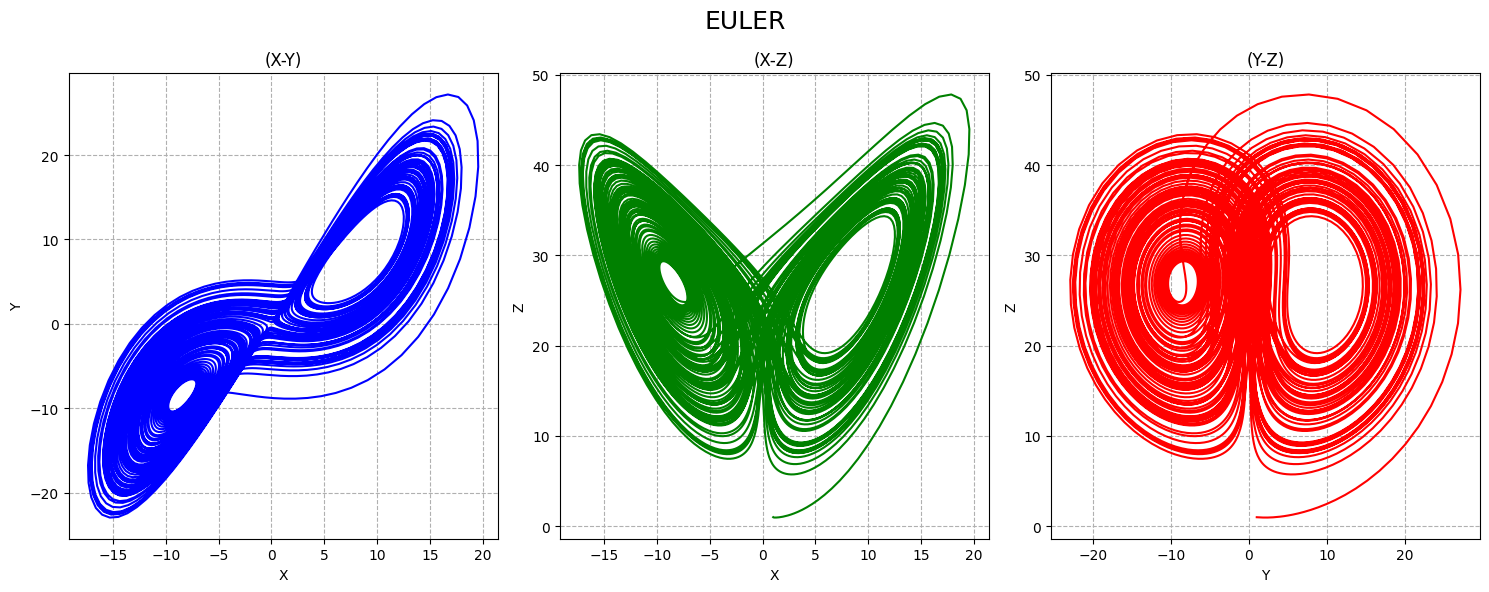

In [ ]:
# show attractors of specified method

show_attractors(
    y = results['runge-kutta-4'], 
    title = "euler",
    threshold=0,
    one_row=True
    )

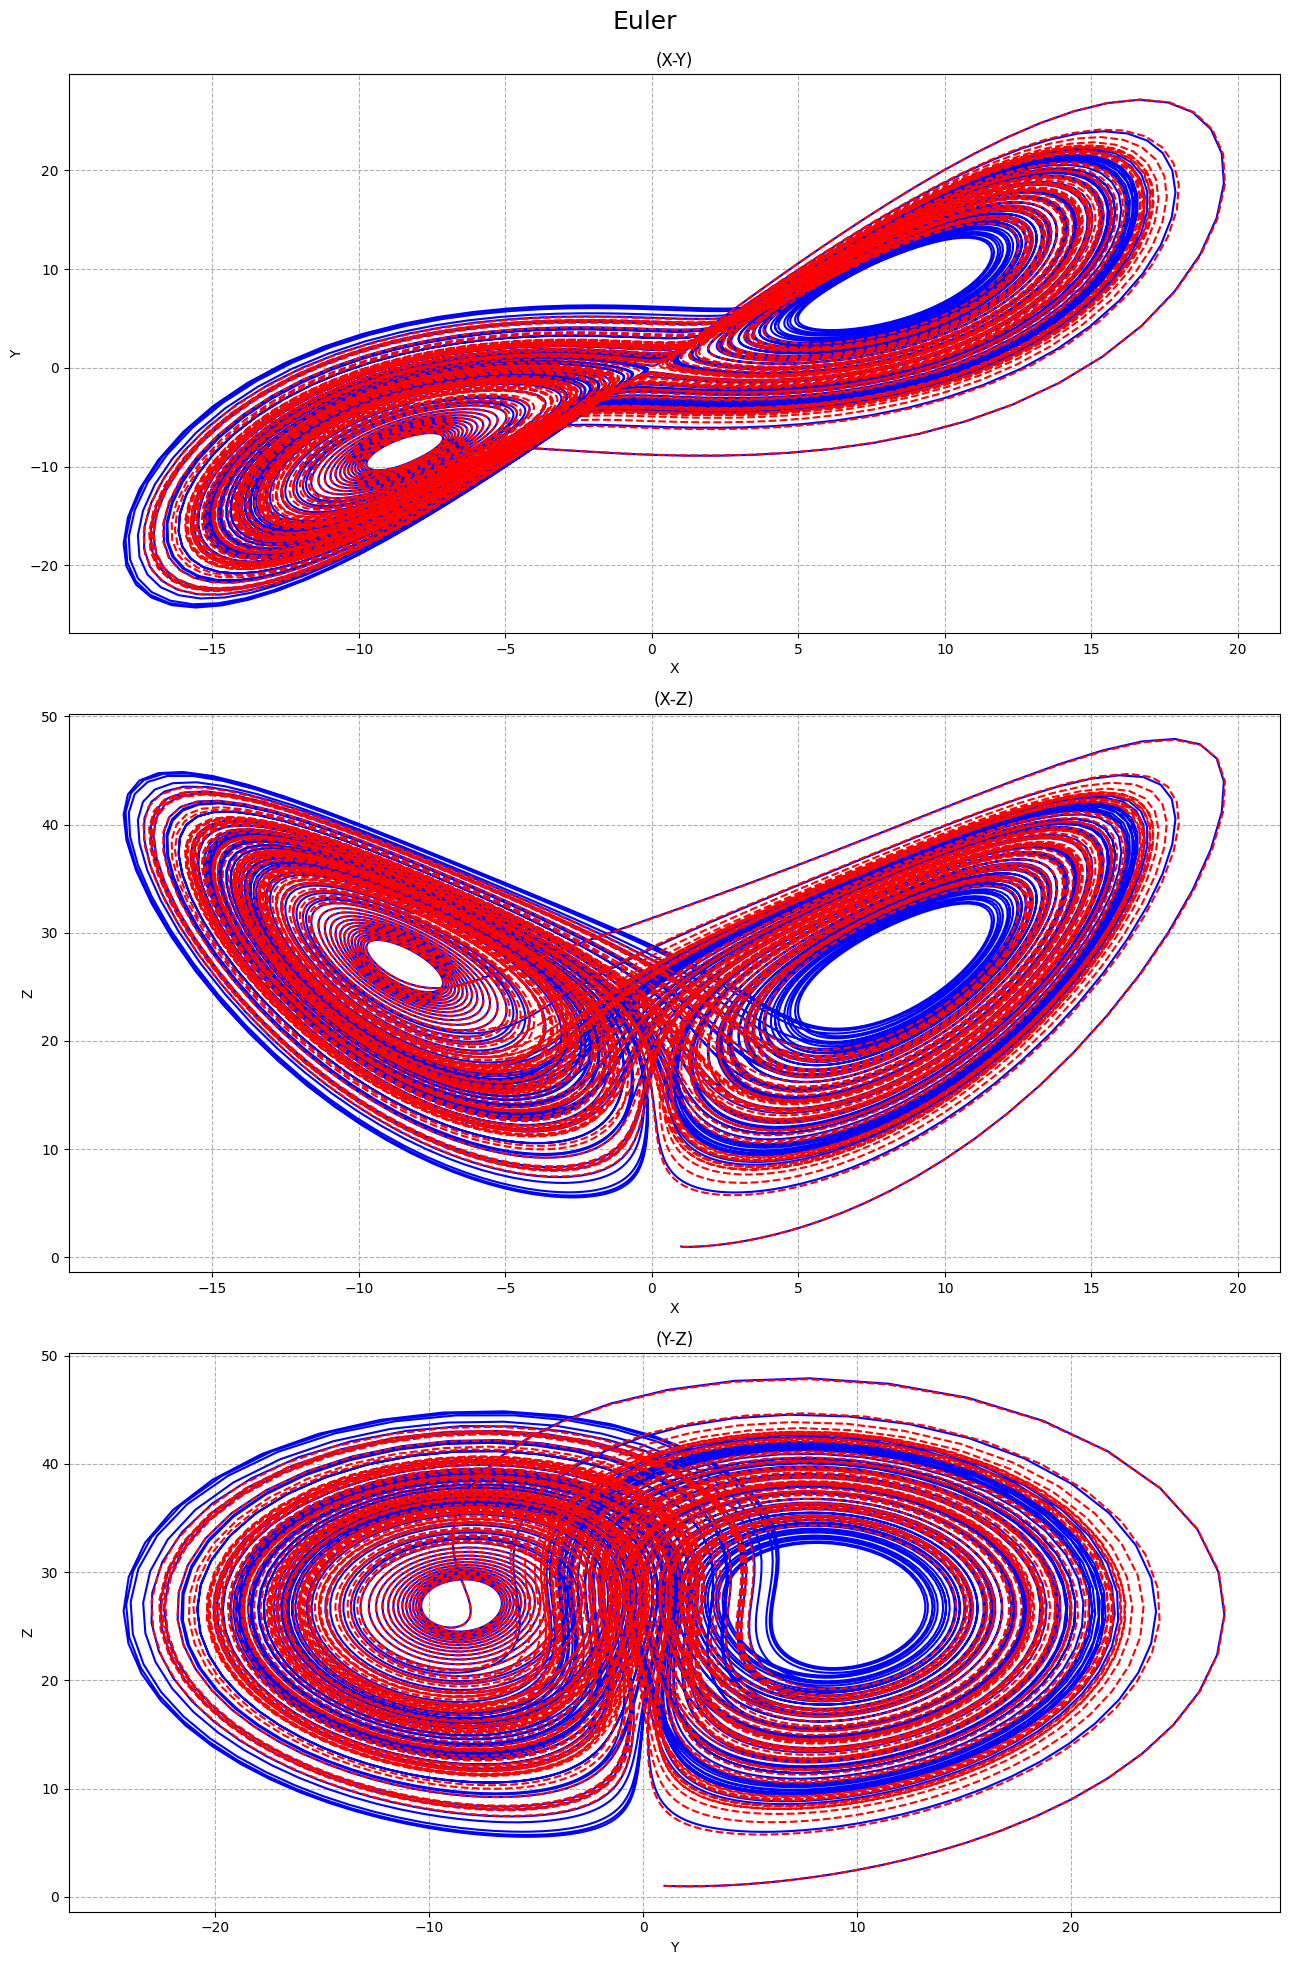

In [83]:
# show attractors of specified method compared to rk-4

fig, axes = plt.subplots(3, 1, figsize=(13, 20))
fig.suptitle("Euler\n", fontsize=18)

add_attractors(
    axes=axes,
    y = results['cd-lorenz'], 
    threshold=0,
    color='blue'
)
add_attractors(
    axes=axes,
    y = results['runge-kutta-4'], 
    threshold=0,
    color='red',
    linestyle='--'
)

plt.tight_layout()
plt.show()